In [19]:
%pylab inline
import json #need this to handle json files

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
dataPath = 'TCO_data.json' #specify the path

In [26]:
with open(dataPath) as f:
    data = json.load(f) # open file and read data
data    

{'-15.0 -15.0': {'Rs': 18.181491196,
  'd': 582.0,
  'mob': 15.905328380039837,
  'ne': 3.708876427017723e+20,
  'rho': 0.0010581627876072,
  'wp': 1.161,
  'x': -15.0,
  'y': -15.0},
 '-15.0 -25.0': {'Rs': 29.4609458,
  'd': 542.0,
  'mob': 13.288394564690552,
  'ne': 2.9418396814090443e+20,
  'rho': 0.0015967832623599999,
  'wp': 1.034,
  'x': -15.0,
  'y': -25.0},
 '-15.0 -35.0': {'Rs': 54.148326936000004,
  'd': 465.0,
  'mob': 9.615477459240797,
  'ne': 2.5782714455445488e+20,
  'rho': 0.002517897202524,
  'wp': 0.968,
  'x': -15.0,
  'y': -35.0},
 '-15.0 -45.0': {'Rs': 135.027844644,
  'd': 421.0,
  'mob': 5.004390777570449,
  'ne': 2.19422339873691e+20,
  'rho': 0.0056846722595124,
  'wp': 0.893,
  'x': -15.0,
  'y': -45.0},
 '-15.0 -5.0': {'Rs': 12.803838123999999,
  'd': 687.0,
  'mob': 18.80827049393128,
  'ne': 3.773042649131668e+20,
  'rho': 0.0008796236791188,
  'wp': 1.171,
  'x': -15.0,
  'y': -5.0},
 '-15.0 15.0': {'Rs': 12.198050216,
  'd': 821.0,
  'mob': 18.586081759

In [22]:
d = []
x = []
y = []

for item in data: #put data into lists
    d.append(data.get(item).get('d'))
    x.append(data.get(item).get('x'))
    y.append(data.get(item).get('y'))
    

In [23]:
# here we're going to interpolate the data so that we can generate a nice smooth contour
res =  1000 # 1000 points in x and y (i.e. plot will have 1,000,000 points!)
xi = linspace(min(x), max(x), res) # make a linear x list
yi = linspace(min(y), max(y), res) #make a linear y list

In [24]:
zi = griddata(x, y, d, xi, yi, interp='linear') # need to take our d list and map it to our new xi, yi coords

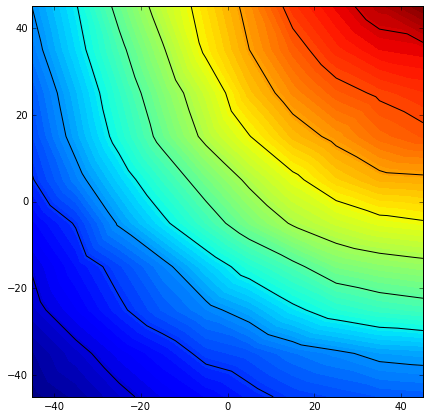

In [25]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.set_aspect('equal') # makes the plots square! (instead of default rectangel)

S = ax.contour(xi, yi, zi, 10, colors='k') # gives us the black lines
C = ax.contourf(xi, yi, zi, 100, cmap='jet') # gives us the coloured contours